In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


SIZE = 35

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))
print("fish_data.shape: ", fish_data.shape)
print("fish_data[:5]:\n", fish_data[:5])

#도미1 빙어0
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print("fish_target: ", fish_target)


fish_data.shape:  (49, 2)
fish_data[:5]:
 [[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
fish_target:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


train_input.shape:  (36, 2)
test_input.shape:  (13, 2)
train_target.shape:  (36,)
test_target.shape:  (13,)
test_target:  [1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
test_target:  [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


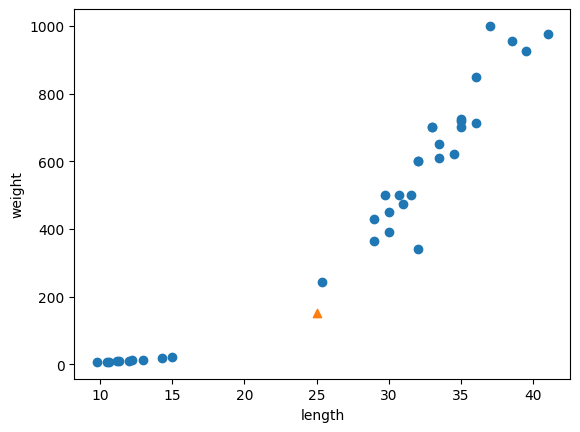

kn.fit:  KNeighborsClassifier()
kn.score:  1.0
kn predict 25,150:  [0.]


In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
print("train_input.shape: ", train_input.shape)
print("test_input.shape: ", test_input.shape)
print("train_target.shape: ", train_target.shape)
print("test_target.shape: ", test_target.shape)
print("test_target: ", test_target)

# 훈련과 테스트 세트의 데이터 분류가 한쪽으로 너무 치우지는 문제가 있으므로 stratify를 사용하여 최대한 균등하게 맞춰준다.
# 물론 빙어 데이터가 적어서 1:1로는 안맞춰짐.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print("test_target: ", test_target)

plt.scatter(train_input[:,0], train_input[:,1])  # 셔플된 x:length, y:weight
plt.scatter(25, 150, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

kn = KNeighborsClassifier()
print("kn.fit: ", kn.fit(train_input, train_target))
print("kn.score: ", kn.score(test_input, test_target))
print("kn predict 25,150: ", kn.predict([[25, 150]]))  # len:25, weight:150 => 도미1 여야 하지만 빙어0로 판단내리고 있음.


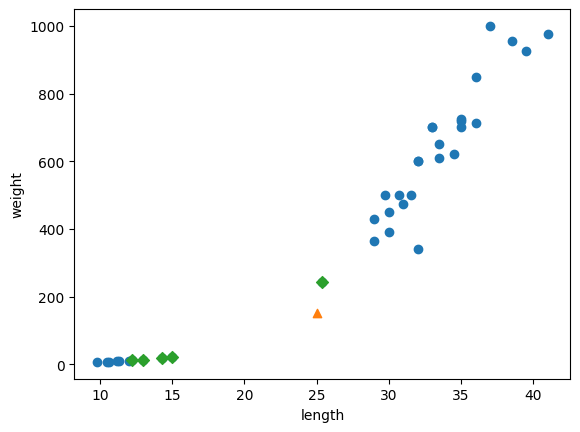

In [4]:
# Non-scale 데이터 (전처리 전)
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

kn.predict([[25, 150]]):  [0.]
near_indexes:  [[21 33 19 30  1]]
near_distances:  [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
train_input[near_indexes]:
 [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
train_target[near_indexes]:
 [[1. 0. 0. 0. 0.]]


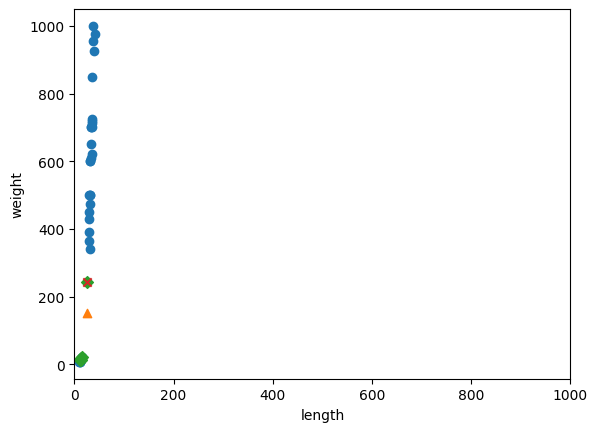

In [5]:
# Scaled Data (전처리 후)
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print("kn.predict([[25, 150]]): ", kn.predict([[25, 150]]))  #  [0.] => 빙어  //도미1, 빙어:0
near_distances, near_indexes = kn.kneighbors([[25, 150]])
print("near_indexes: ", near_indexes)
print("near_distances: ", near_distances)
print("train_input[near_indexes]:\n", train_input[near_indexes])

# 0이 더 많이 나온다. 25, 150은 도미로 나와야 함에도 최근점에 빙어가 더 많은 문제가 있다.
print("train_target[near_indexes]:\n", train_target[near_indexes])  # 1:도미, 0:빙어

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[near_indexes, 0], train_input[near_indexes, 1], marker="D")
plt.xlim((0, 1000))  # x축의 범위를 0에서 1000로 변경.
plt.scatter(train_input[21, 0], train_input[21, 1], marker="x")  # index:21, distance:92, target:1 (도미)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

Mean:  (27.055102040816323, 133.7)
StandardDeviation:  (10.137746423175521, 324.77757223763376)
kn.score:  1.0
test_fish_zscores:  [[-0.20271784  0.05018819]]
kn.predict(test_fish_zscore):  [1.]


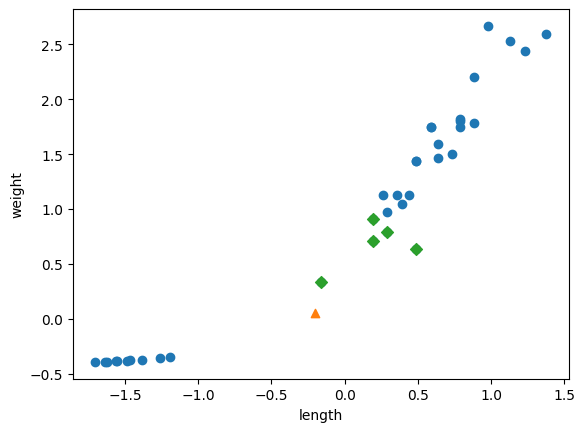

In [6]:
"""데이터의 스케일을 표준점수zscore화 시킨 뒤 다시 테스트한다.
"""

# fish_data를 표준점수화 시킨다.
mean = (np.mean(fish_data[:,0]), np.mean(fish_data[:1]))
std = (np.std(fish_data[:,0]), np.std(fish_data[:,1]))
print("Mean: ", mean)
print("StandardDeviation: ", std)
zscore = (fish_data-mean) / std
# print("ZScore: ", zscore)
# print("ZSchore.shape: ", zscore.shape)

# 표준점수화된 데이터를 훈련용과 검증용으로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(zscore, fish_target, stratify=fish_target, random_state=42)
# print("TrainInput: ", train_input)
# print("TestInput: ", test_input)
# print("TrainTarget: ", train_target)
# print("TestTarget: ", test_target)

# K-이웃분류기 준비한다.
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
score = kn.score(test_input, test_target)
print("kn.score: ", score)

# 테스트용 데이터를 준비한다.
test_fish_zscore = (np.array((25,150)) - mean) / std
test_fish_zscores = np.array([test_fish_zscore])
print("test_fish_zscores: ", test_fish_zscores)

# 테스트용 데이터와 가까운 데이터들의 index과 거리값을 얻는다.
near_distances, near_indexes = kn.kneighbors(test_fish_zscores)

# 테스트용 데이터를 통해 분류값을 추론한다.
kn.predict(test_fish_zscores)
print("kn.predict(test_fish_zscore): ", kn.predict(test_fish_zscores))  #  [0.] => 빙어  //도미1, 빙어:0

# 차트를 그린다.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_fish_zscore[0], test_fish_zscore[1], marker="^")
plt.scatter(train_input[near_indexes, 0], train_input[near_indexes, 1], marker="D") # 테스트용 데이터와 가까운 데이터 포인트을 식별하기 쉽게 마킹한다.
# plt.xlim((-3, 3))
# plt.ylim((-1, 3))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()